## 서포트 벡터 머신
- 새로운 데이터가 입력되었을 때 기존 데이터를 활용해 분류하는 방법
- 패턴 인식, 자료 분석 등을 위한 지도 학습 모델로 회귀와 분류 문제 해결에 사용되는 알고리즘

In [1]:
## 서포트 벡터 방식으로 분류 분석
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
c = pd.read_csv("./data/classification.csv")
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


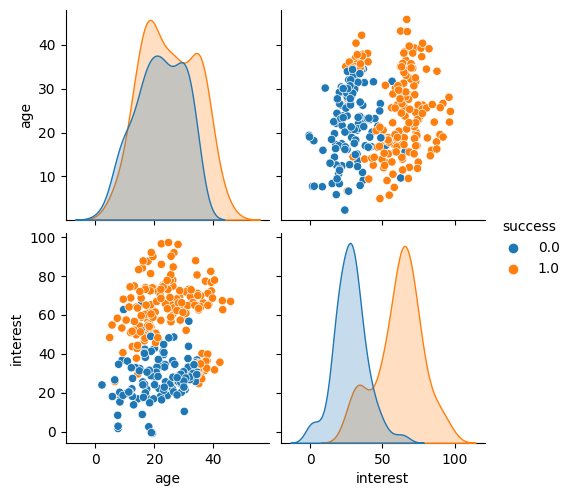

In [3]:
## 데이터 클래스 분포를 그래프로 확인
sns.pairplot(hue='success', data =c)

In [6]:
## 데이터의 분할
from sklearn.model_selection import train_test_split
x =c[['age', 'interest']]
y =c['success']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


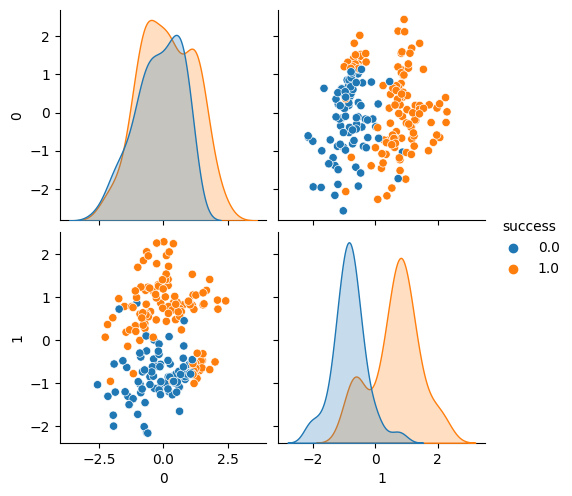

In [7]:
## svm은 특성의 스케일에 민감하기 때문에 StandardScaler를 사용하면 좀 더 예측력이 높은 결정 경계를 생성
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
sns.pairplot(hue='success', data=pd.concat([pd.DataFrame(x_train), y_train.reset_index(drop=True)], axis=1))

In [8]:
## SVC로 모델을 만들고 데이터 적합
from sklearn.svm import SVC

clf = SVC(C=0.5)
clf.fit(x_train, y_train)

SVC(C=0.5)

In [10]:
## 테스트 모델로 모델 평가를 수행
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

x_test_scal = scaler.transform(x_test)
pred = clf.predict(x_test_scal)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도 ', round(test_acc*100, 2))
print('정밀도 ', round(test_prc*100, 2))
print('재현율 ', round(test_rcll*100, 2))
print('F1', round(test_f1*100, 2))

[[37  2]
 [ 2 49]]
정확도  95.56
정밀도  96.08
재현율  96.08
F1 96.08


In [11]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

C:\Users\AD\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'color', 'linestyle'
c:\Python 3.7.1\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\AD\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'color', 'linestyle'


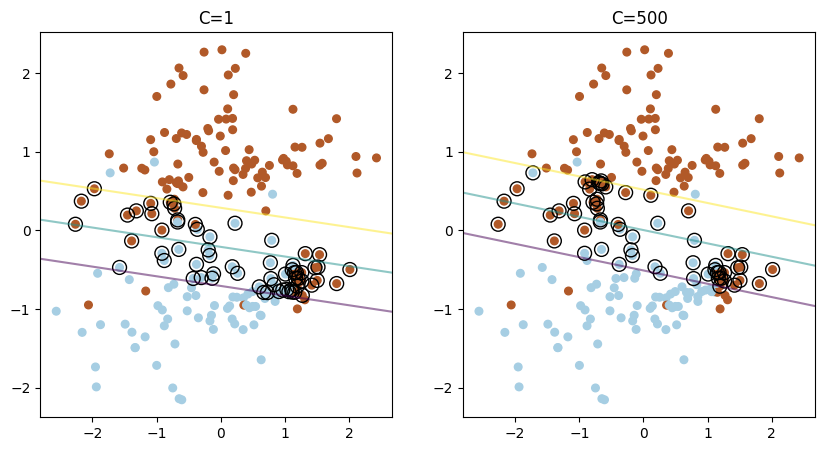

In [19]:
## 하이퍼파라미터 C에 따라 마진에서 어떠한 변화가 발생하는 지 확인
## C가 커지면 마진과 옳지 않은 데이터의 허용치가 증가

plt.figure(figsize=(10,5))
for i,C in enumerate([1, 500]):
    clf= LinearSVC(C=C, loss='hinge', random_state=42).fit(x_train, y_train)
    ## decision function 으로 서포트 벡터 얻기
    decision_function = clf.decision_function(x_train)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vector = x_train[support_vector_indices]

    plt.subplot(1, 2, i+1)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s= 30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), \
        np.linspace(ylim[0], ylim[1], 50))

    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    plt.contour(xx, yy, z, color='k', levels=[-1,0,1], alpha=0.5, linestyle=['--', '-', '--'])
    plt.scatter(support_vector[:,0], support_vector[:,1], s=100, linewidth= 1, facecolors='none', edgecolors='k')

    plt.title('C='+str(C))

plt.show()

In [ ]:
## C가 1일 때보다 C가 500일 때 마진과 반대방향인 데이터가 더 많이 허용된다.

In [22]:
## 서포트 벡터 바익 회귀 분석
x = np.sort(5 * np.random.rand(40,1), axis=0)
y = np.sin(x).ravel()
print(x[:6], y[:10])

[[0.54202945]
 [0.58966103]
 [0.64375192]
 [0.75557643]
 [0.78014465]
 [1.20218532]] [0.51587561 0.55607933 0.60020063 0.68570835 0.70338225 0.93282873
 0.93505673 0.99840256 0.99756368 0.98178301]


In [23]:
## 타겟데이터에 노이즈 추가
y[::5] += 3 * (0.5-np.random.rand(8))
print(y[:10])

[ 0.2860951   0.55607933  0.60020063  0.68570835  0.70338225 -0.2697645
  0.93505673  0.99840256  0.99756368  0.98178301]


In [24]:
## 회귀 모델 적합(랜덤포레스트, 선형회귀, 다항회귀)
from sklearn.svm import SVR

svr_rbf = SVR(kernel = 'rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly',C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(x,y)
svr_lin.fit(x,y)
svr_poly.fit(x,y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [25]:
## 예측값 생성
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

from sklearn.metrics import mean_squared_error, mean_absolute_error

results = pd.DataFrame(index=kernel, columns=evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)

    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['mae'] = round(mae, 2)
    results.loc[nm]['rmse'] = round(rmse,2)

results

,mse,rmse,mae
Random Forest,0.19,0.43,0.23
Linear,0.41,0.64,0.42
Polynomial,0.2,0.44,0.22
